# MediMouse

## Business Problem

This project simulates a medical study where mice infected with a virus were treated with varying doses of two different medicines. Two weeks post-treatment, the infection status of each mouse was recorded.

The objective is to develop a classification model that can predict whether a mouse will remain infected based on the administered dosages of the two medicines. This model aims to support decision-making in optimizing treatment strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Load the Data

In [2]:
df=pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.shape

(400, 3)

In [5]:
df['Virus Present'].value_counts()

Virus Present
0    200
1    200
Name: count, dtype: int64

## Visualization

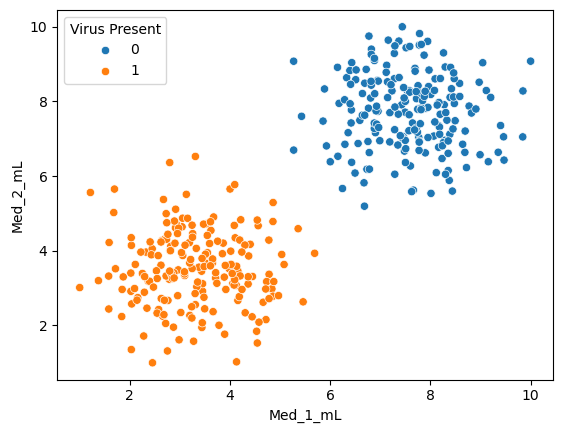

In [6]:
sns.scatterplot(x=df['Med_1_mL'],y=df['Med_2_mL'],hue=df['Virus Present'])
plt.show()

## Seperate X & y

In [7]:
X=df.drop("Virus Present",axis=1)
y=df['Virus Present']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### SVM with Default Parameters

In [8]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print(f"Train accuracy is {accuracy_score(y_train,ypred_train)}")
print(f"Test accuracy is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(model,X_train,y_train,cv=5)).mean()}")

Train accuracy is 1.0
Test accuracy is 1.0
CV score is 1.0


### Hyperparameter Tuning

In [10]:
from sklearn.model_selection import GridSearchCV
estimator=SVC()
param_grid={"C":[0.01,0.1,1,10,100],"kernel":['linear','rbf','sigmoid','poly']}
model=GridSearchCV(estimator,param_grid,cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [11]:
model.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [12]:
model=SVC(kernel='linear',C=0.01)
model.fit(X_train,y_train)

ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print(f"Train accuracy is {accuracy_score(y_train,ypred_train)}")
print(f"Test accuracy is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(model,X_train,y_train,cv=5)).mean()}")

Train accuracy is 1.0
Test accuracy is 1.0
CV score is 1.0


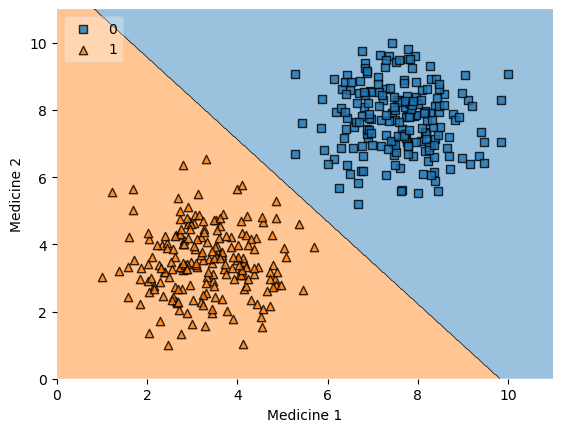

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.to_numpy(),y.to_numpy(),clf=model,legend=2)
plt.xlabel("Medicine 1")
plt.ylabel("Medicine 2")
plt.show()

## 🧠 Conclusions

The **MediMouse** project successfully demonstrates the use of machine learning for predicting infection outcomes in a controlled medical simulation involving mice and two types of medication.

### ✅ Key Takeaways:

- **High Accuracy**: The linear SVM model achieved perfect performance:
  - **Training Accuracy**: 100%
  - **Testing Accuracy**: 100%
  - **Cross-Validation Score**: 100%

- **Linearly Separable Data**: The visual decision boundary confirms that the dataset is linearly separable, which justifies the excellent performance of a linear classifier.

- **Effective Feature Selection**: Dosage levels of two medicines are sufficient to reliably predict infection status in this simulated scenario.

- **Model Simplicity**: Despite its simplicity, the linear SVM model performed exceptionally well without requiring complex preprocessing or feature engineering.

### 🔬 Implications:

- This modeling approach could be extended to real-world biomedical applications, where dosage-response relationships are critical.
- The project highlights the potential of machine learning to aid in optimizing treatment strategies by predicting patient outcomes.


---

MediMouse proves that with clean, separable data, even simple machine learning models can deliver powerful insights.
